In [1]:
from maml import *
import matplotlib.pyplot as plt
import os

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "1"

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)

Current device: cuda


In [4]:
maml = MAML(5, 0.01, 0.0005, 0, 2, 1, -1, 1, eqname='poisson', zero_shot=True, load=False, modelpath='models/poisson_zs_2000_ref.data')
# maml = MAML(5, 0.01, 0.0001, 10, 2, 100, -1, 1, eqname='burgers', zero_shot=False, load=False, modelpath='models/model_ref/burgers_zs_1000_ref.data')
# maml = MAML(5, 0.01, 0.0001, 0, 2, 1, low=-1, high=1, eqname='poisson')

train_loss, val_loss, val_ood_loss, nrmse, model = maml.train(5000, 100, 100)

Initializing MAML-PINN model
Current device:  cuda
cuda
Zero shot mode is True
Finished initialization of MAML-PINN model
Start MAML training at iteration 0
Validation before training Pre-Adapt(0.336, -0.451)| Inner_loss_B: 1.0920 | Inner_loss_F: 0.1636 | Inner_loss: 11.0838 | NRMSE: 56.5975
Validation before training Post-Adapt(0.336, -0.451)| Inner_loss_B: 0.2231 | Inner_loss_F: 0.1486 | Inner_loss: 2.3795 | NRMSE: 0.3604
Validation OOD before training Pre-Adapt(-1.231, -1.046) | Inner_loss_B: 0.9579 | Inner_loss_F: 2.8353 | Inner_loss: 12.4141 | NRMSE: 71.5356
Validation OOD before training Post-Adapt(-1.231, -1.046) | Inner_loss_B: 0.5999 | Inner_loss_F: 2.4096 | Inner_loss: 8.4088 | NRMSE: 2.7348


C:\Users\fembem\anaconda3\envs\torch-1.10.1\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fembem\anaconda3\envs\torch-1.10.1\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Step 20 Pre-Adapt | Inner_loss_B: 0.8942 | Inner_loss_F: 0.2466 | Inner_loss: 9.1882
Step 20 Post-Adapt | Inner_loss_B: 0.1870 | Inner_loss_F: 0.2151 | Inner_loss: 2.0854
Step 40 Pre-Adapt | Inner_loss_B: 0.7574 | Inner_loss_F: 0.2036 | Inner_loss: 7.7780
Step 40 Post-Adapt | Inner_loss_B: 0.1429 | Inner_loss_F: 0.1774 | Inner_loss: 1.6063
Step 60 Pre-Adapt | Inner_loss_B: 0.6694 | Inner_loss_F: 0.2195 | Inner_loss: 6.9135
Step 60 Post-Adapt | Inner_loss_B: 0.1309 | Inner_loss_F: 0.1840 | Inner_loss: 1.4932
Step 80 Pre-Adapt | Inner_loss_B: 0.6611 | Inner_loss_F: 0.1763 | Inner_loss: 6.7874
Step 80 Post-Adapt | Inner_loss_B: 0.1035 | Inner_loss_F: 0.1463 | Inner_loss: 1.1816
Model saved
Step 100 Pre-Adapt | Inner_loss_B: 0.6088 | Inner_loss_F: 0.2183 | Inner_loss: 6.3060
Step 100 Post-Adapt | Inner_loss_B: 0.0831 | Inner_loss_F: 0.1734 | Inner_loss: 1.0042
Validation before training Pre-Adapt(0.336, -0.451)| Inner_loss_B: 0.6724 | Inner_loss_F: 0.1276 | Inner_loss: 6.8511 | NRMSE: 3.21

In [18]:
import pandas as pd

nrmse_df = pd.DataFrame(nrmse)
val_loss_df = pd.DataFrame(val_loss)
val_ood_loss_df = pd.DataFrame(val_ood_loss)
train_loss_df = pd.DataFrame(train_loss)

nrmse_df.to_csv('data/nrmse_poisson_high1_zs_maml.csv')
val_loss_df.to_csv('data/val_loss_poisson_high1_zs_maml.csv')
val_ood_loss_df.to_csv('data/val_ood_loss_poisson_high1_zs_maml.csv')
train_loss_df.to_csv('data/train_loss_poisson_high1_zs_maml.csv')

Text(0.5, 1.0, 'Post-adapt validation losses (in-distribution)')

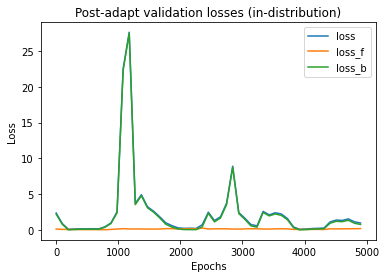

In [40]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_loss_df['inner_loss']), label='loss')
plt.plot(x, np.array(val_loss_df['inner_loss_f']), label='loss_f')
plt.plot(x, np.array(val_loss_df['inner_loss_b']) * 10, label='loss_b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Post-adapt validation losses (in-distribution)')

Text(0.5, 1.0, 'Pre-adapt validation losses (in-distribution)')

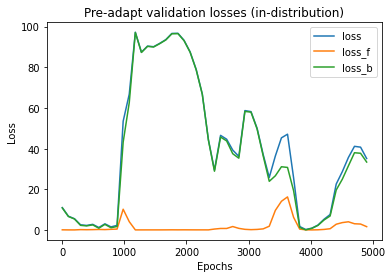

In [39]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_loss_df['inner_loss_pre_adapt']), label='loss')
plt.plot(x, np.array(val_loss_df['inner_loss_f_pre_adapt']), label='loss_f')
plt.plot(x, np.array(val_loss_df['inner_loss_b_pre_adapt']) * 10, label='loss_b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Pre-adapt validation losses (in-distribution)')

Text(0.5, 1.0, 'Post-adapt validation losses (out-of-distribution)')

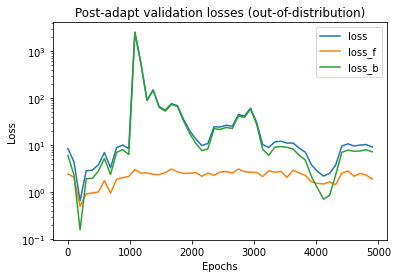

In [42]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_ood_loss_df['inner_loss']), label='loss')
plt.plot(x, np.array(val_ood_loss_df['inner_loss_f']), label='loss_f')
plt.plot(x, np.array(val_ood_loss_df['inner_loss_b']) * 10, label='loss_b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Post-adapt validation losses (out-of-distribution)')

Text(0.5, 1.0, 'Pre-adapt validation losses (out-of-distribution)')

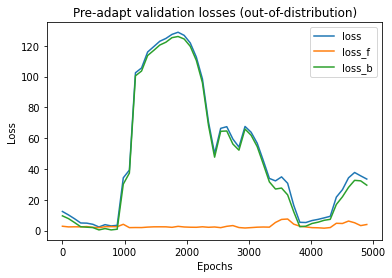

In [43]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_ood_loss_df['inner_loss_pre_adapt']), label='loss')
plt.plot(x, np.array(val_ood_loss_df['inner_loss_f_pre_adapt']), label='loss_f')
plt.plot(x, np.array(val_ood_loss_df['inner_loss_b_pre_adapt']) * 10, label='loss_b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Pre-adapt validation losses (out-of-distribution)')

Text(0.5, 1.0, 'Pre-adapt vs post-adapt validation losses (in-distribution)')

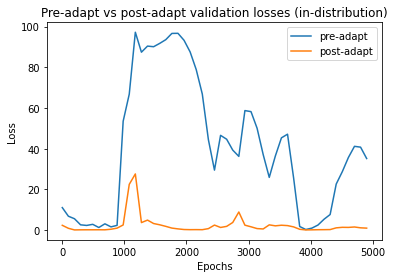

In [44]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_loss_df['inner_loss_pre_adapt']), label='pre-adapt')
plt.plot(x, np.array(val_loss_df['inner_loss']), label='post-adapt')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Pre-adapt vs post-adapt validation losses (in-distribution)')

Text(0.5, 1.0, 'Pre-adapt vs post-adapt validation losses (out-of-distribution)')

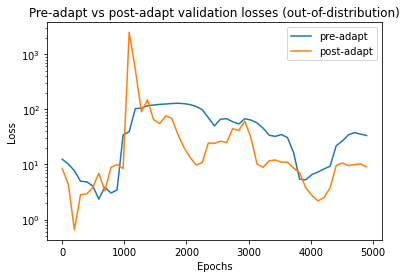

In [46]:
data_len = len(val_loss_df['inner_loss'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(val_ood_loss_df['inner_loss_pre_adapt']), label='pre-adapt')
plt.plot(x, np.array(val_ood_loss_df['inner_loss']), label='post-adapt')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')
plt.title('Pre-adapt vs post-adapt validation losses (out-of-distribution)')

Text(0.5, 1.0, 'Validation metrics (out-of-distribution)')

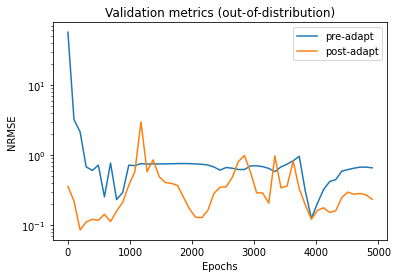

In [47]:
data_len = len(nrmse['nrmse_val'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(nrmse['nrmse_val_pre_adapt']), label='pre-adapt')
plt.plot(x, np.array(nrmse['nrmse_val']), label='post-adapt')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('NRMSE')
plt.legend()
plt.title('Validation metrics (out-of-distribution)')

Text(0.5, 1.0, 'Validation metrics (out-of-distribution)')

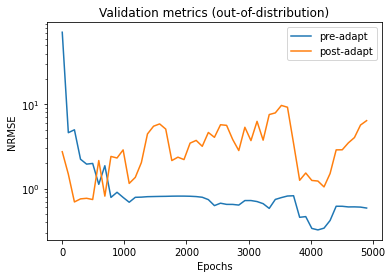

In [38]:
data_len = len(nrmse['nrmse_val'])
x = np.array([i * 5000 / data_len for i in range(data_len)])
plt.plot(x, np.array(nrmse['nrmse_val_ood_pre_adapt']), label='pre-adapt')
plt.plot(x, np.array(nrmse['nrmse_val_ood']), label='post-adapt')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('NRMSE')
plt.legend()
plt.title('Validation metrics (out-of-distribution)')

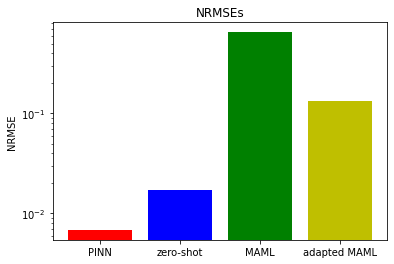

In [35]:
x = np.arange(4)
methods = ['PINN', 'zero-shot', 'MAML', 'adapted MAML']
values = [0.006841598904306745, 0.017072844474532906, 0.649507876627482, 0.13184379901471588]
colors = ['r', 'b', 'g', 'y']

plt.bar(x, values, color=colors)
plt.xticks(x, methods)
plt.yscale('log')
plt.ylabel('NRMSE')
plt.title('NRMSEs')

plt.show()

In [8]:
model = PINN(20, 5, dim=1, param_num=2, zero_shot=True)
model.load_state_dict(torch.load('models/maml_poisson_high1_4000.data'))
model.to(device)

PINN(
  (module1): Sequential(
    (0): Linear(in_features=3, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)
test_x = np.linspace(-1, 1, num=100).reshape(-1, 1)
# test_alpha = np.full((100, 1), alpha[2])
# test_beta = np.full((100, 1), beta[2])
test_alpha = np.full((100, 1), -0.830)
test_beta = np.full((100, 1), -0.617)
test_in = np.hstack((test_x, test_alpha, test_beta))
test_u = model(torch.Tensor(test_in).to(device))
X = test_x

Y = np.sin(test_alpha * X) + np.cos(test_beta * X) + 0.1 * X



Current device: cuda


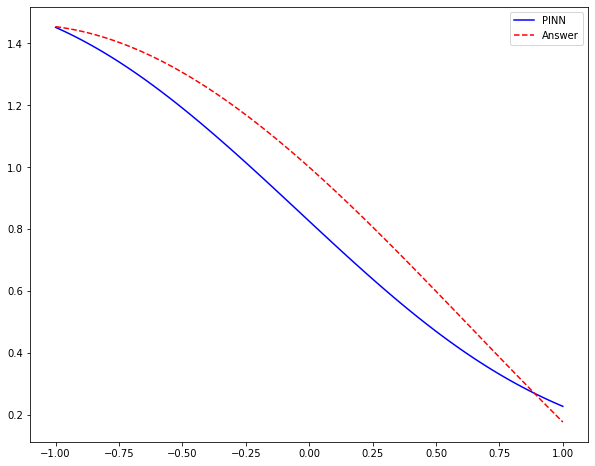

In [15]:
C = test_u.cpu().detach().numpy()
plt.figure(figsize=(10, 8))
plt.plot(X, C, 'b-', label='PINN')
plt.plot(X, Y, 'r--', label='Answer')
plt.legend()

In [16]:
np.sqrt( np.sum((C-Y)**2) / np.sum(C**2) )

0.13252834703931599

In [ ]:
# steps = [ 1000 / len(val_loss['inner_loss']) * i for i in range(len(val_loss['inner_loss']))]
# idx = [100 * i for i in range(10)]
# loss = train_loss['inner_loss_f'][::100]
# plt.plot(val_loss['inner_loss'], label='loss')
plt.plot(np.mean(nrmse['nrmse_val'], axis=1), label='Val.')
plt.plot(np.mean(nrmse['nrmse_val_ood'], axis=1), label='Val. OOD')
plt.legend()
plt.title('FO-MAML Val. Poisson')
# plt.plot( loss)
# plt.plot(nrmse['nrmse_val'])
# plt.plot(nrmse['nrmse_val_ood'])
# plt.plot(train_loss['inner_loss'])

In [ ]:
from train import *

In [ ]:
epochs = 500
lr = 0.001

In [ ]:
# loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse_set = train(epochs=epochs, lr=lr, i_size=100, b_size=100, f_size=1000, zero_shot=False, load=True, load_data='models/maml_burgers_5000.data', alpha_list=0.01 / np.pi, eqname='burgers')
loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse_set = train(epochs=epochs, lr=lr, i_size=0, b_size=2, f_size=10, zero_shot=False, load=True, load_data='maml.data', alpha_list=0.7, beta_list=-0.9, eqname='poisson')

In [ ]:
# loss_i_2, loss_b_2, loss_f_2, loss_2, model_2, val_loss_2, val_ood_loss_2, nrmse_set_2 = train(epochs=epochs, lr=lr, i_size=100, b_size=100, f_size=1000, zero_shot=False, load=False, load_data='maml.data', alpha_list=0.01 / np.pi, eqname='burgers')
loss_i_2, loss_b_2, loss_f_2, loss_2, model_2, val_loss_2, val_ood_loss_2, nrmse_set_2 = train(epochs=epochs, lr=lr, i_size=0, b_size=2, f_size=10, zero_shot=False, load=False, load_data='maml.data', alpha_list=0.7, beta_list=-0.9, eqname='poisson')

In [ ]:
plt.title('Loss Few shot')
plt.yscale('log')
plt.plot(loss, label='MAML')
plt.plot(loss_2, label='Random')
plt.legend()

In [ ]:
plt.title('Relative error Few shot')
plt.yscale('log')
plt.plot(nrmse_set, label='MAML')
plt.plot(nrmse_set_2, label='Random')
plt.legend()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)
test_x = np.linspace(-1, 1, num=100).reshape(-1, 1)
# test_alpha = np.full((100, 1), alpha[2])
# test_beta = np.full((100, 1), beta[2])
test_alpha = np.full((100, 1), 0.7)
test_beta = np.full((100, 1), 0.7)
# test_in = np.hstack((test_x, test_alpha, test_beta))
test_u = model_2(torch.Tensor(test_x).to(device))
X = test_x

Y = np.sin(test_alpha * X) + np.cos(test_beta * X) + 0.1 * X


In [ ]:
C = test_u.cpu().detach().numpy()
plt.figure(figsize=(10, 8))
plt.scatter(X, C, label='PINN')
plt.scatter(X, Y, label='Answer')
plt.legend()
plt.colorbar()

In [ ]:
plt.plot(loss)
plt.plot(loss_2)

In [ ]:
from burgers import *

In [ ]:
vtn = 101
vxn = 101
nu = 0.01 / np.pi
vx = np.linspace(-1, 1, vxn)
vt = np.linspace(0, 1, vtn)

vu = burgers_viscous_time_exact1(nu, vxn, vx, vtn, vt)

x, t = np.meshgrid(vx, vt)
x = x.reshape(-1, 1)
t = t.reshape(-1, 1)

plt.scatter(x, t, c=vu, cmap='seismic')
plt.colorbar()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)

In [ ]:
vtn = 101
vxn = 101
nu = 0.01 / np.pi
vx = np.linspace(-1, 1, vxn)
vt = np.linspace(0, 1, vtn)
x, t = np.meshgrid(vx, vt)
x = x.reshape(-1, 1)
t = t.reshape(-1, 1)
alpha = np.full((x.shape), nu)
pred = model_2(torch.Tensor(np.hstack((x, t))).to(device)).detach().cpu().numpy()
# pred = model(torch.Tensor(np.hstack((x, t))).to(device)).detach().cpu().numpy()
truth = burgers_viscous_time_exact1(nu, vxn, vx, vtn, vt).T.reshape(-1, 1)

In [ ]:
plt.scatter(x, t, c=pred, cmap='seismic')
plt.colorbar()